# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/zero_shot_segmentation/blob/main/measure_point_based_segmentation.ipynb) and run.


## Set Up Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
image_directory = '/content/drive/Shareddrives/Yolab - Current Projects/_Datasets/2020-11-10 10x OCT2Hist Model (Paper V2)/Results/TestSet/'

Mounted at /content/drive/


In [2]:
#segment anything (sam)
using_colab = True
visualize_sam_outputs = True

#sam algorithm input parameters
points_per_side=32
pred_iou_thresh=0.90
stability_score_thresh=0.95
crop_n_layers=1
crop_n_points_downscale_factor=2
min_mask_region_area=3000

#sam model type and weights checkpoint
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

In [3]:
#rf - roboflow dataset related params
rf_api_key="R04BinsZcBZ6PsfKR2fP"
rf_workspace="yolab-kmmfx"
rf_project = "connect_from_colab"
rf_dataset = "png-mask-semantic"

In [4]:
import torch
import torchvision
!git clone --recurse-submodules https://github.com/WinetraubLab/zero_shot_segmentation.git
%run /content/zero_shot_segmentation/setup_roboflow_and_sam.ipynb


DEVICE = torch.device('cuda')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "/content/sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
predictor = SamPredictor(sam)

Cloning into 'zero_shot_segmentation'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 219 (delta 33), reused 21 (delta 8), pack-reused 160
Receiving objects: 100% (219/219), 22.75 MiB | 22.70 MiB/s, done.
Resolving deltas: 100% (100/100), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to connect_from_colab-1 in png-mask-semantic:: 100%|██████████| 6/6 [00:00<00:00, 2468.21it/s]


/content/connect_from_colab-1/test
/content/connect_from_colab-1/test/_annotations.coco.json
PyTorch version: 2.1.0+cu118
Torchvision version: 0.16.0+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-dkbf4c8d
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-dkbf4c8d
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=7666da2b6d5127c73f32ecfbd2483f5a538ac0535ad8073289b692d6f2bd679a
  Stored in directory: /tmp/pip-ephem-wheel-cache-zyixlrnh/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-11-05 19:45:08--  https://pbs.twimg.com/media/FvpQj7UWYAAgxfo?format=jpg
Resolving pb

In [5]:

!git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-ModelInference
!pip install -r ./OCT2Hist-ModelInference/pytorch-CycleGAN-and-pix2pix/requirements.txt

Cloning into 'OCT2Hist-ModelInference'...
remote: Enumerating objects: 775, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 775 (delta 153), reused 190 (delta 100), pack-reused 504
Receiving objects: 100% (775/775), 25.11 MiB | 21.61 MiB/s, done.
Resolving deltas: 100% (410/410), done.
Submodule 'pytorch-CycleGAN-and-pix2pix' (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) registered for path 'pytorch-CycleGAN-and-pix2pix'
Cloning into '/content/OCT2Hist-ModelInference/pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.        
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513        
Receiving objects: 100% (2513/2513), 8.20 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
Submodule path 'pytorch-CycleGAN-and-pix2pix': checked out '9f8f61e5a375c2e01c5187d093ce9c2409f409b0'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.6 MB/s eta 0:00:0

In [6]:
sys.path.append('./zero_shot_segmentation')
sys.path.append('./OCT2Hist-ModelInference')

import oct2hist
from utils.show_images import *
# Set up the network environment
oct2hist.setup_network()

Mounting drive: if it takes >30 sec, re-run.
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive mounted.


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import oct2hist
from utils.show_images import *
from utils.crop import crop


In [8]:
import random
import os
# List all files in the directory
all_images = os.listdir(image_directory)

# Filter out images without the suffix _realB
filtered_images = [img for img in all_images if "real_A" in img]
random.shuffle(filtered_images)
filtered_images = filtered_images[:10]

# Uncomment this part if you would like to try a single image rather than all.
#filtered_images = [''] # for one good example: ['LG-37-Slide06_Section02_yp0_patch01_real_A.png']

Mean of empty slice
Mean of empty slice


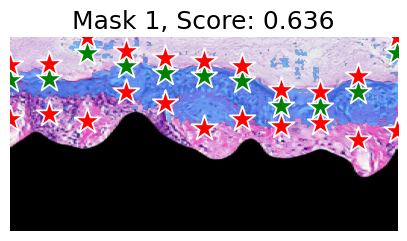

Image LG-66-Slide04_Section02_yp0_patch01_real_A.png ready.


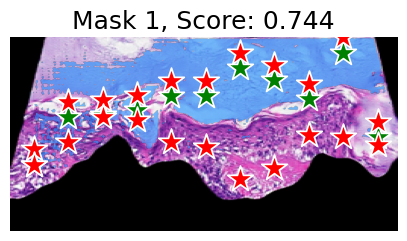

Image LG-23-Slide03_Section02_yp0_patch01_real_A.png ready.


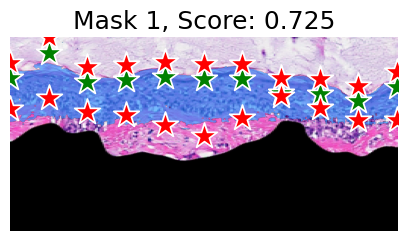

Image LG-64-Slide07_Section03_yp0_patch01_real_A.png ready.


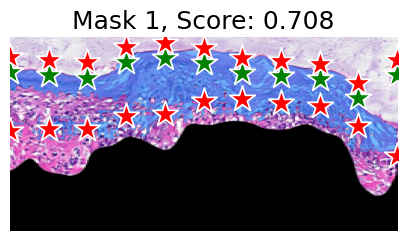

Image LGC-76-Slide03_Section03_yp0_patch01_real_A.png ready.


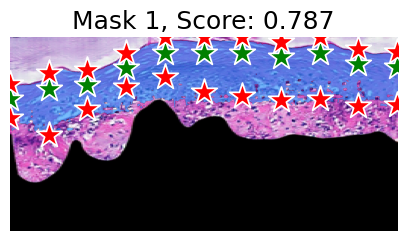

Image LGC-58-Slide07_Section03_yp0_patch01_real_A.png ready.


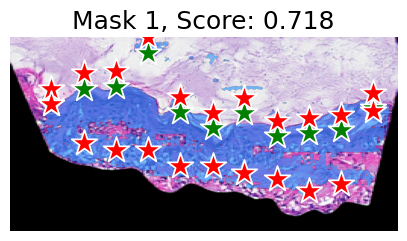

Image LG-19-Slide06_Section02_yp0_patch01_real_A.png ready.


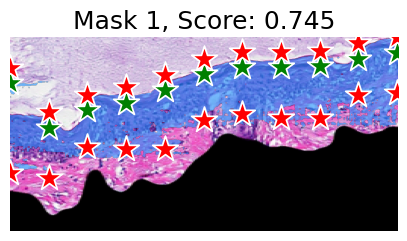

Image LG-03-Slide04_Section03_yp0_patch01_real_A.png ready.


In [9]:
# -*- coding: utf-8 -*-
"""run_oct2hist.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb

# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb) and run.
"""

import random
import sys
from utils.show_images import showImg

import torch
from segment_anything import sam_model_registry, SamPredictor

import oct2hist
from utils.masking import get_sam_input_points, show_points, show_mask, mask_gel_and_low_signal

# from google.colab import drive

import cv2
import matplotlib.pyplot as plt

import os

for filename in filtered_images:
    oct_input_image_path = os.path.join(image_directory, filename)
    # Load OCT image
    oct_image = cv2.imread(oct_input_image_path)
    oct_image = cv2.cvtColor(oct_image, cv2.COLOR_BGR2RGB)
    #is it sheered?
    right_column = oct_image.shape[1]-1
    if (oct_image[:,0,0] == 0).all() or (oct_image[:,right_column,0] == 0).all():
        continue
    # OCT image's pixel size
    microns_per_pixel_z = 1
    microns_per_pixel_x = 1

    # no need to crop - the current folder contains pre cropped images.
    # cropped = crop_oct(oct_image)

    #workaround: for some reason the images look close to the target shape, but not exactly.
    oct_image = cv2.resize(oct_image, [1024, 512], interpolation=cv2.INTER_AREA)

    #for good input points, we need the gel masked out.
    masked_gel_image = mask_gel_and_low_signal(oct_image)

    # run vh&e
    virtual_histology_image, _, o2h_input = oct2hist.run_network(oct_image,
                                                                                             microns_per_pixel_x=microns_per_pixel_x,
                                                                                             microns_per_pixel_z=microns_per_pixel_z)
    # mask
    input_point, input_label = get_sam_input_points(masked_gel_image, virtual_histology_image)

    predictor.set_image(virtual_histology_image)
    masks, scores, logits = predictor.predict(point_coords=input_point, point_labels=input_label,
                                              multimask_output=False, )

    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(5, 5))
        plt.imshow(virtual_histology_image)
        show_mask(mask, plt.gca())
        show_points(input_point, input_label, plt.gca())
        plt.title(f"Mask {i + 1}, Score: {score:.3f}", fontsize=18)
        plt.axis('off')
        plt.show()
    print(f"Image {filename} ready.")
